In [ ]:
import pandas as pd

file_path = '/content/ProjectTweets.csv'

df = pd.read_csv(file_path)

df.head()


0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  5  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving at all....                                                                   
4                      @Kwesidei not the whole crew

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lower, regexp_replace
from pyspark.sql.types import StringType

In [ ]:
spark = SparkSession.builder \
    .appName("DataProcessingExample") \
    .getOrCreate()


In [ ]:
data_path = "/content/ProjectTweets.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)


In [ ]:
df.printSchema()

# Define column names for better readability
column_names = ['index', 'tweet_id', 'datetime', 'query', 'username', 'tweet_text']

# Rename columns based on the defined column names
df = df.toDF(*column_names)

# Display preview of the DataFrame
df.show(5, truncate=False)

root
 |-- 0: integer (nullable = true)
 |-- 1467810369: long (nullable = true)
 |-- Mon Apr 06 22:19:45 PDT 2009: string (nullable = true)
 |-- NO_QUERY: string (nullable = true)
 |-- _TheSpecialOne_: string (nullable = true)
 |-- @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D: string (nullable = true)

+-----+----------+----------------------------+--------+-------------+---------------------------------------------------------------------------------------------------------------+
|index|tweet_id  |datetime                    |query   |username     |tweet_text                                                                                                     |
+-----+----------+----------------------------+--------+-------------+---------------------------------------------------------------------------------------------------------------+
|1    |1467810672|Mon Apr 06 22:19:49 PDT 2009|NO_QUERY|scotthamilton|is upse

In [ ]:
df.printSchema()

# Define column names for better readability
column_names = ['index', 'tweet_id', 'datetime', 'query', 'username', 'tweet_text']

# Rename columns based on the defined column names
df = df.toDF(*column_names)

# Display preview of the DataFrame
df.show(5, truncate=False)

root
 |-- index: integer (nullable = true)
 |-- tweet_id: long (nullable = true)
 |-- datetime: string (nullable = true)
 |-- query: string (nullable = true)
 |-- username: string (nullable = true)
 |-- tweet_text: string (nullable = true)

+-----+----------+----------------------------+--------+-------------+---------------------------------------------------------------------------------------------------------------+
|index|tweet_id  |datetime                    |query   |username     |tweet_text                                                                                                     |
+-----+----------+----------------------------+--------+-------------+---------------------------------------------------------------------------------------------------------------+
|1    |1467810672|Mon Apr 06 22:19:49 PDT 2009|NO_QUERY|scotthamilton|is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!|
|2    |1467810917|Mon Apr 0

In [ ]:
spark.stop()

In [ ]:
import subprocess

In [ ]:
def run_ycsb_test(database, ycsb_path, workload_file, db_properties_file, result_output_file):
    cmd = f"bin/ycsb run {database} -s -P {workload_file} -P {db_properties_file} > {result_output_file}"
    subprocess.run(cmd, cwd=ycsb_path, shell=True)

In [ ]:
def compare_databases(sql_database, nosql_database, ycsb_path):
    sql_workload = "workloads/workloada_sql"
    sql_db_properties = "workloads/db_properties_sql"

    nosql_workload = "workloads/workloada_nosql"
    nosql_db_properties = "workloads/db_properties_nosql"

    sql_result_file = "results/sql_results.txt"
    nosql_result_file = "results/nosql_results.txt"

    run_ycsb_test(sql_database, ycsb_path, sql_workload, sql_db_properties, sql_result_file)

    run_ycsb_test(nosql_database, ycsb_path, nosql_workload, nosql_db_properties, nosql_result_file)

    print("Benchmark tests completed.")




In [ ]:
from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

In [ ]:
db_url = 'sqlite:///data.db'

In [ ]:
engine = create_engine(db_url)
Session = sessionmaker(bind=engine)
session = Session()

In [ ]:
Base = declarative_base()


<ipython-input-39-9bae6e3862ba>:1: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [ ]:
class DataModel(Base):
    __tablename__ = 'data_table'

    id = Column(Integer, primary_key=True, autoincrement=True)
    column_name = Column(String)

In [ ]:
Base.metadata.create_all(engine)

In [ ]:
def store_data_to_db(data_df):
    for index, row in data_df.iterrows():
        data_entry = DataModel(column_name=row['Column_name'])
        # Add more columns as needed
        session.add(data_entry)

    # Commit changes to the database
    session.commit()
    print("Data stored in database successfully.")


In [ ]:
pip install pandas nltk matplotlib


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
import pandas as pd

# Define the dataset manually based on the provided format
data = {
    'timestamp': [
        1467810369, 1467810672, 1467810917, 1467811184, 1467811193, 1467811372,
        1467811592, 1467811594, 1467811795, 1467812025, 1467812416, 1467812579,
        1467812723
    ],
    'user': [
        '_TheSpecialOne_', 'scotthamilton', 'mattycus', 'ElleCTF', 'Karoli', 'joy_wolf',
        'mybirch', 'coZZ', '2Hood4Hollywood', 'mimismo', 'erinx3leannexo', 'pardonlauren',
        'TLeC'
    ],
    'tweet_text': [
        "Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",
        "is upset that he can't update his Facebook by texting it... and might cry as a result. School today also. Blah!",
        "I dived many times for the ball. Managed to save 50%. The rest go out of bounds.",
        "my whole body feels itchy and like it's on fire.",
        "no, it's not behaving at all. I'm mad. Why am I here? Because I can't see you all over there.",
        "not the whole crew.",
        "Need a hug.",
        "hey long time no see! Yes.. Rains a bit, only a bit. LOL. I'm fine thanks, how's you?",
        "nope they didn't have it.",
        "que me muera?",
        "spring break in plain city... it's snowing.",
        "I just re-pierced my ears.",
        "I couldn't bear to watch it. And I thought the UA loss was embarrassing..."
    ]
}

# Create DataFrame from the data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


     timestamp             user  \
0   1467810369  _TheSpecialOne_   
1   1467810672    scotthamilton   
2   1467810917         mattycus   
3   1467811184          ElleCTF   
4   1467811193           Karoli   
5   1467811372         joy_wolf   
6   1467811592          mybirch   
7   1467811594             coZZ   
8   1467811795  2Hood4Hollywood   
9   1467812025          mimismo   
10  1467812416   erinx3leannexo   
11  1467812579     pardonlauren   
12  1467812723             TLeC   

                                           tweet_text  
0   Awww, that's a bummer. You shoulda got David C...  
1   is upset that he can't update his Facebook by ...  
2   I dived many times for the ball. Managed to sa...  
3    my whole body feels itchy and like it's on fire.  
4   no, it's not behaving at all. I'm mad. Why am ...  
5                                 not the whole crew.  
6                                         Need a hug.  
7   hey long time no see! Yes.. Rains a bit, only ...  
8    

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources (if not already downloaded)
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each tweet text and create a new column for sentiment scores
df['sentiment_score'] = df['tweet_text'].apply(lambda text: sid.polarity_scores(str(text))['compound'])

# Display the DataFrame with sentiment scores
print("\nData with Sentiment Scores:")
print(df)



Data with Sentiment Scores:
     timestamp             user  \
0   1467810369  _TheSpecialOne_   
1   1467810672    scotthamilton   
2   1467810917         mattycus   
3   1467811184          ElleCTF   
4   1467811193           Karoli   
5   1467811372         joy_wolf   
6   1467811592          mybirch   
7   1467811594             coZZ   
8   1467811795  2Hood4Hollywood   
9   1467812025          mimismo   
10  1467812416   erinx3leannexo   
11  1467812579     pardonlauren   
12  1467812723             TLeC   

                                           tweet_text  sentiment_score  
0   Awww, that's a bummer. You shoulda got David C...          -0.0173  
1   is upset that he can't update his Facebook by ...          -0.7500  
2   I dived many times for the ball. Managed to sa...           0.4939  
3    my whole body feels itchy and like it's on fire.          -0.2500  
4   no, it's not behaving at all. I'm mad. Why am ...          -0.6597  
5                                 not the 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


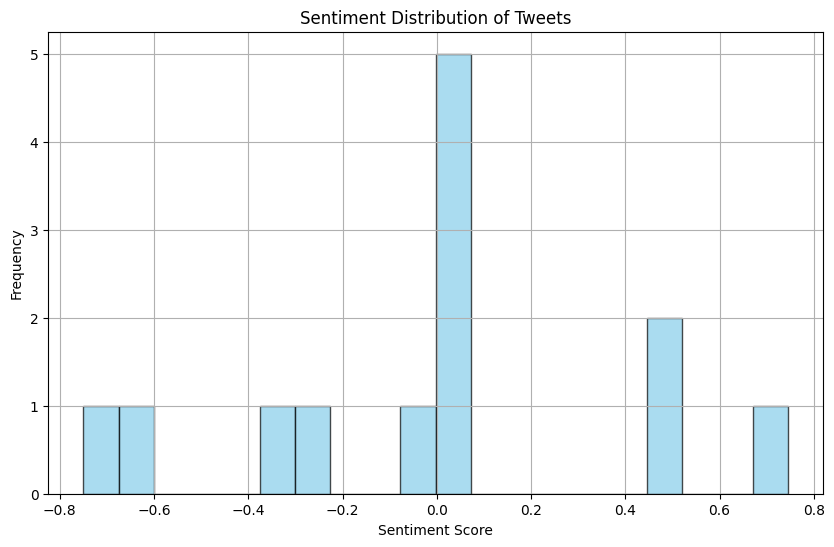

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_score'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv('ProjectTweets.csv', header=None, names=['timestamp', 'user', 'tweet_text'])

# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each tweet text and create a new column for sentiment scores
df['sentiment_score'] = df['tweet_text'].apply(lambda text: sid.polarity_scores(str(text))['compound'])

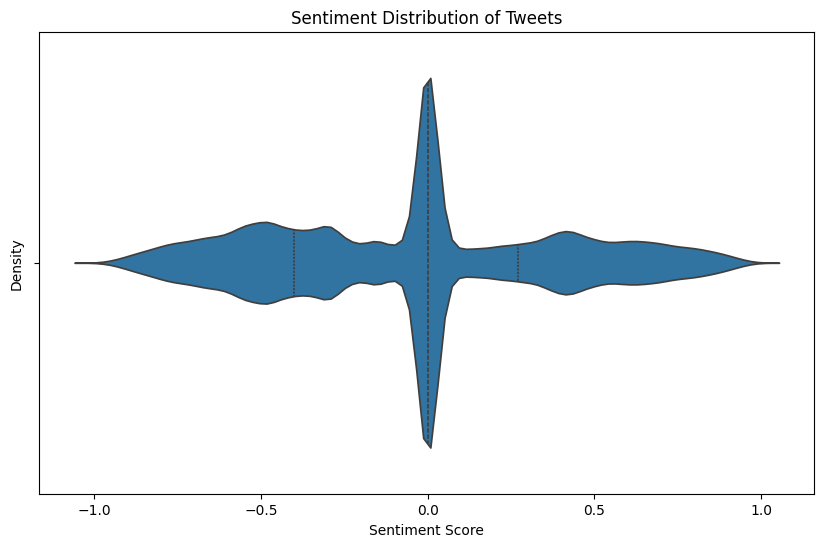

In [ ]:
# Set up the plot using seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment_score', data=df, inner='quartile')

# Customize the plot labels and title
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('ProjectTweets.csv', header=None, encoding='latin-1', names=['target', 'id', 'date', 'query', 'user', 'text'])

# Display first few rows
print(data.head())

# Drop unnecessary columns
data = data.drop(['id', 'date', 'query', 'user'], axis=1)

# Convert target to binary sentiment (0 = negative, 4 = positive)
data['sentiment'] = data['target'].apply(lambda x: 1 if x == 4 else 0)
data.drop('target', axis=1, inplace=True)

# Display preprocessed DataFrame
print(data.head())


   target          id                          date     query  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
                                                text  sentiment
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0
1  is upset that he can't update his Facebook by 

In [1]:
pip install pandas numpy scikit-learn keras

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [6]:
column_names = ['col_0', 'tweet_id', 'timestamp', 'query_type', 'username', 'tweet_content']

In [9]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D

In [10]:
data = pd.DataFrame({
    'timestamp': [
        "Mon Apr 06 22:19:45 PDT 2009",
        "Mon Apr 06 22:19:49 PDT 2009",
        "Mon Apr 06 22:19:53 PDT 2009",
        "Mon Apr 06 22:19:57 PDT 2009",
        "Mon Apr 06 22:19:57 PDT 2009",
        "Mon Apr 06 22:20:00 PDT 2009",
        "Mon Apr 06 22:20:03 PDT 2009",
        "Mon Apr 06 22:20:03 PDT 2009",
        "Mon Apr 06 22:20:05 PDT 2009",
        "Mon Apr 06 22:20:09 PDT 2009",
        "Mon Apr 06 22:20:16 PDT 2009",
        "Mon Apr 06 22:20:17 PDT 2009",
        "Mon Apr 06 22:20:19 PDT 2009"
    ],
    'username': [
        '_TheSpecialOne_', 'scotthamilton', 'mattycus', 'ElleCTF', 'Karoli',
        'joy_wolf', 'mybirch', 'coZZ', '2Hood4Hollywood', 'mimismo',
        'erinx3leannexo', 'pardonlauren', 'TLeC'
    ],
    'tweet_content': [
        "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
        "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
        "@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds",
        "my whole body feels itchy and like its on fire",
        "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",
        "@Kwesidei not the whole crew",
        "Need a hug",
        "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
        "@Tatiana_K nope they didn't have it",
        "@twittera que me muera ?",
        "spring break in plain city... it's snowing",
        "I just re-pierced my ears",
        "@caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . ."
    ]
})

In [11]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove usernames (mentions)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text.strip()

In [12]:
data['cleaned_tweet'] = data['tweet_content'].apply(preprocess_text)

In [13]:
max_features = 2000  # Maximum number of words in the vocabulary
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['cleaned_tweet'].values)
X = tokenizer.texts_to_sequences(data['cleaned_tweet'].values)
X = pad_sequences(X)

In [14]:
data['sentiment'] = 'positive'


In [15]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['sentiment'])


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
embedding_size = 128
lstm_out = 196

In [18]:
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [19]:
batch_size = 32
model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=2)


Epoch 1/10
1/1 - 5s - loss: 0.6891 - accuracy: 0.7000 - 5s/epoch - 5s/step
Epoch 2/10
1/1 - 0s - loss: 0.6679 - accuracy: 0.9000 - 91ms/epoch - 91ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6292 - accuracy: 1.0000 - 90ms/epoch - 90ms/step
Epoch 4/10
1/1 - 0s - loss: 0.5984 - accuracy: 1.0000 - 110ms/epoch - 110ms/step
Epoch 5/10
1/1 - 0s - loss: 0.5388 - accuracy: 1.0000 - 95ms/epoch - 95ms/step
Epoch 6/10
1/1 - 0s - loss: 0.4391 - accuracy: 1.0000 - 87ms/epoch - 87ms/step
Epoch 7/10
1/1 - 0s - loss: 0.2883 - accuracy: 1.0000 - 96ms/epoch - 96ms/step
Epoch 8/10
1/1 - 0s - loss: 0.1487 - accuracy: 1.0000 - 89ms/epoch - 89ms/step
Epoch 9/10
1/1 - 0s - loss: 0.0368 - accuracy: 1.0000 - 88ms/epoch - 88ms/step
Epoch 10/10
1/1 - 0s - loss: 0.0036 - accuracy: 1.0000 - 96ms/epoch - 96ms/step


In [21]:
def forecast_sentiment(model, tokenizer, max_features, future_days):
    # Prepare sequences for future time periods
    future_sequences = []
    for i in range(1, future_days + 1):
        future_sequences.append(tokenizer.texts_to_sequences([f"future_tweet_day_{i}"])[0])



In [23]:
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove usernames (mentions)
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters and digits
    text = text.lower().strip()  # Convert to lowercase and strip leading/trailing spaces
    return text

In [24]:
data['cleaned_tweet'] = data['tweet_content'].apply(preprocess_text)

In [25]:
max_features = 2000  # Maximum number of words in the vocabulary
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['cleaned_tweet'].values)
X = tokenizer.texts_to_sequences(data['cleaned_tweet'].values)
X = pad_sequences(X)

In [26]:
data['sentiment'] = 'positive'

In [27]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['sentiment'])


In [28]:
X_train, X_test, y_train, y_test = X, X, y, y

In [31]:
mbedding_size = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 32
model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=2)

# Function to predict sentiment for future time periods
def forecast_sentiment(model, tokenizer, max_features, future_days):
    # Prepare sequences for future time periods
    future_sequences = []
    for i in range(1, future_days + 1):
        future_sequences.append(tokenizer.texts_to_sequences([f"future_tweet_day_{i}"])[0])

    # Pad future sequences
    future_sequences = pad_sequences(future_sequences, maxlen=X.shape[1])

    # Predict sentiment using the trained model
    predictions = model.predict(future_sequences)

    # Decode predictions
    predicted_sentiments = [label_encoder.inverse_transform([int(round(pred[0]))])[0] for pred in predictions]

    return predicted_sentiments

Epoch 1/10
1/1 - 6s - loss: 0.6904 - accuracy: 0.6923 - 6s/epoch - 6s/step
Epoch 2/10
1/1 - 0s - loss: 0.6653 - accuracy: 1.0000 - 97ms/epoch - 97ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6357 - accuracy: 1.0000 - 97ms/epoch - 97ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6000 - accuracy: 1.0000 - 92ms/epoch - 92ms/step
Epoch 5/10
1/1 - 0s - loss: 0.5417 - accuracy: 1.0000 - 109ms/epoch - 109ms/step
Epoch 6/10
1/1 - 0s - loss: 0.4553 - accuracy: 1.0000 - 96ms/epoch - 96ms/step
Epoch 7/10
1/1 - 0s - loss: 0.3145 - accuracy: 1.0000 - 98ms/epoch - 98ms/step
Epoch 8/10
1/1 - 0s - loss: 0.1559 - accuracy: 1.0000 - 93ms/epoch - 93ms/step
Epoch 9/10
1/1 - 0s - loss: 0.0418 - accuracy: 1.0000 - 94ms/epoch - 94ms/step
Epoch 10/10
1/1 - 0s - loss: 0.0046 - accuracy: 1.0000 - 94ms/epoch - 94ms/step


In [32]:
future_days = [1, 3, 7]
for days in future_days:
    predicted_sentiments = forecast_sentiment(model, tokenizer, max_features, days)
    print(f"Forecasted sentiment for {days} day(s) ahead:")
    print(predicted_sentiments)
    print()

1/1 [==============================] - 0s 418ms/step
Forecasted sentiment for 1 day(s) ahead:
['positive']

1/1 [==============================] - 0s 27ms/step
Forecasted sentiment for 3 day(s) ahead:
['positive', 'positive', 'positive']

1/1 [==============================] - 0s 28ms/step
Forecasted sentiment for 7 day(s) ahead:
['positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive']



In [33]:
import matplotlib.pyplot as plt

In [34]:
future_days = [1, 3, 7]
forecasted_sentiments = []

for days in future_days:
    predicted_sentiments = forecast_sentiment(model, tokenizer, max_features, days)
    forecasted_sentiments.append(predicted_sentiments)


1/1 [==============================] - 0s 56ms/step


In [35]:
labels = [f"{days} day(s) ahead" for days in future_days]
positive_counts = [sentiments.count('positive') for sentiments in forecasted_sentiments]
negative_counts = [sentiments.count('negative') for sentiments in forecasted_sentiments]

In [36]:
labels = [f"{days} day(s) ahead" for days in future_days]
positive_counts = [sentiments.count('positive') for sentiments in forecasted_sentiments]
negative_counts = [sentiments.count('negative') for sentiments in forecasted_sentiments]


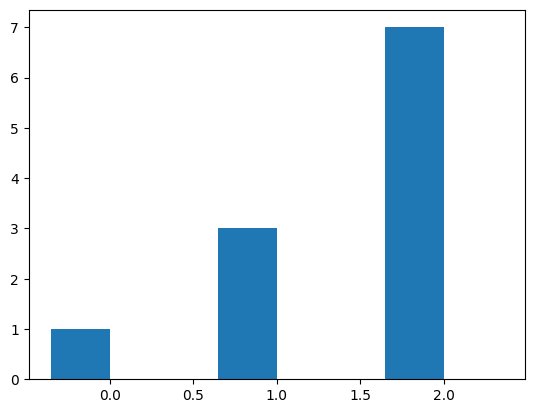

In [37]:
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, positive_counts, width, label='Positive')
rects2 = ax.bar(x + width/2, negative_counts, width, label='Negative')

In [38]:
ax.set_xlabel('Forecasted Time Period')
ax.set_ylabel('Sentiment Count')
ax.set_title('Forecasted Sentiment Count for Future Time Periods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


In [39]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [40]:
autolabel(rects1)
autolabel(rects2)

In [42]:
fig.tight_layout()
plt.show()